<h1 style="color:#2192f1" align="center"> LINEAR REGRESSION</h1>


<h2 align="center" style="color:#f0e912">IMPORT LIBRARIES</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

<h2 align="center" style="color:#f0e912">DATA EXPLORATION</h2>


In [2]:
df_train = pd.read_csv("data/randomly_generated/train.csv")
df_test = pd.read_csv("data/randomly_generated/test.csv")

In [3]:
df_train.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [4]:
df_train["y"].isnull().sum()
# Drop the rows where at least one element is missing
df_train.dropna(inplace=True)
df_train.reset_index(drop=True, inplace=True)

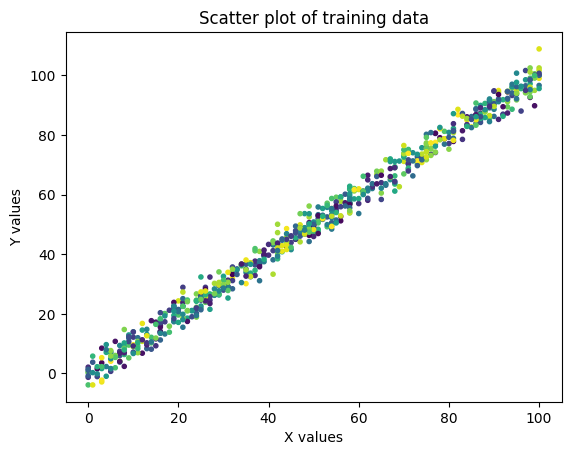

In [5]:
matplotlib.use("module://matplotlib_inline.backend_inline")

colors = np.random.uniform(15, 80, len(df_train["x"]))
fig, ax = plt.subplots()

ax.scatter(df_train["x"], df_train["y"], c=colors, marker='.')

# Add labels and title
ax.set_xlabel("X values")
ax.set_ylabel("Y values")
ax.set_title("Scatter plot of training data")

plt.show()


<h2 align="center" style="color:#f0e912">TRAINING</h2>


In [6]:
# Transform features and target into numpy
X = df_train["x"].values.reshape(-1, 1)
y = df_train["y"].values.reshape(-1, 1)
# Intercept feature
i_term = np.ones((len(X), 1))
# Add intercept feature in other features
X = np.concatenate((i_term, X), axis=1)
# Initialize weights with 0
w = np.zeros((X.shape[1], 1))
# Weights history
weights_history = []
loss_history = []

In [7]:
# Hypothesis function
def h_function(x):
    return (w.T @ x).item()

In [8]:
# one data error
def error(i):
    return h_function(X[i]) - y[i]

In [9]:
# Cost function
def cost_function():
    return np.sum([error(i) ** 2 for i in range(len(X))]) / (2 * len(X))

In [11]:
"""
Gradient descent algorithm with 3 approach
 - Batch Gradient Descent (BGD)
 - Stochastic Gradient Descent (SGD)
 - Mini Batch Gradient Descent (MBGD)
"""
def gradient_descent(epsilon=0.001, max_iter=1000, type="BGD", alpha=0.0001, batch_size=32):
    global w
    cost = cost_function()
    loss_history.append(cost)
    weights_history.append(w.copy())

    if type == "BGD" or type == "MBGD":
        for _ in range(max_iter):
            for j in range(len(w)):
                if type == "BGD":
                    grad = np.sum([error(i) * X[i][j] for i in range(len(X))]) / len(X)
                else:
                    chosen_data = np.random.choice(len(X), batch_size, replace=False)
                    grad = np.sum([error(i) * X[i][j] for i in chosen_data]) / batch_size
                w[j] = w[j] - alpha * grad
            weights_history.append(w.copy())
            new_cost = cost_function()
            loss_history.append(new_cost)
            difference = abs(new_cost - cost)
            if  difference < epsilon:
                print("Convergence!")
                break
            else:
                cost = new_cost
    elif type == "SGD":
        for i in range(len(X)):
            for j in range(len(w)):
                grad = error(i) * X[i][j]
                w[j] = w[j] - alpha * grad
            weights_history.append(w.copy())
            cost = cost_function()
            loss_history.append(cost)
    else:
        raise ValueError("Invalid gradient descent type")


    theta0, theta1 = w[0].item(), w[1].item()
    print(f"Final weights : \nθ₀ = {theta0}\nθ₁ = {theta1}")

In [12]:
gradient_descent(type="MBGD")

Convergence!
Final weights : 
θ₀ = 0.01300344895319563
θ₁ = 0.9980069678661109


<h3 align="center" style="color:#467BD8">VISUALIZATION</h3>


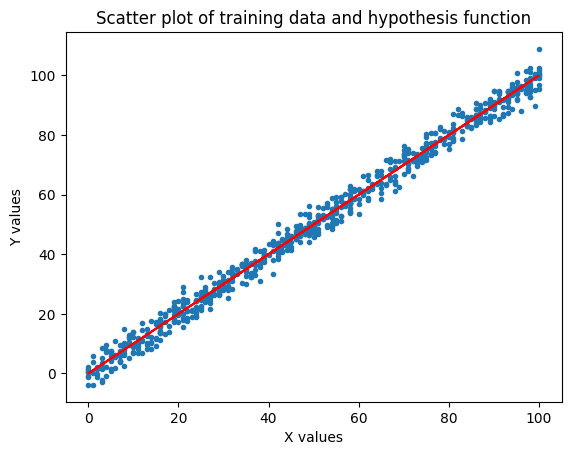

In [13]:
"""
# Plot the hypothesis function using the final weights over the training data
"""

matplotlib.use("module://matplotlib_inline.backend_inline")
image = np.array([h_function(x) for x in X])
_, ax = plt.subplots()
ax.scatter(df_train["x"], df_train["y"], marker='.')
ax.plot(image, image, color="red")

# Add labels and title
ax.set_xlabel("X values")
ax.set_ylabel("Y values")
ax.set_title("Scatter plot of training data and hypothesis function")

plt.show()

In [15]:
weights_history = np.array([w.flatten() for w in weights_history])
loss_history = np.array(loss_history, dtype=np.float64)

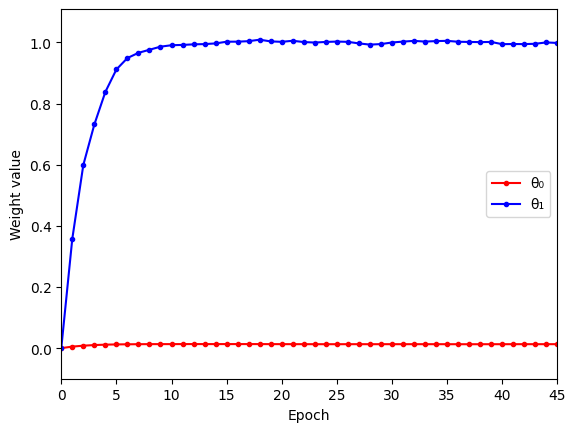

In [16]:
"""
# Plot weights evolution over time
"""

_, ax = plt.subplots()
ax.set_xlabel("Epoch")
ax.set_ylabel("Weight value")

epochs = len(weights_history)
x = np.arange(epochs)  # epoch indices

# Plot weight curves directly
ax.plot(x, weights_history[:,0], "r.-", label="θ₀")
ax.plot(x, weights_history[:,1], "b.-", label="θ₁")
ax.legend()

# Optionally set axis limits
ax.set_xlim(0, epochs-1)
ax.set_ylim(np.min(weights_history)-0.1, np.max(weights_history)+0.1)

plt.show()


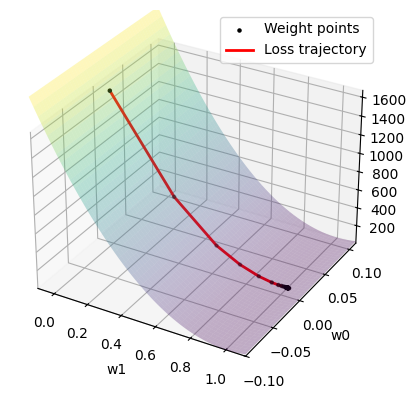

In [23]:
"""
# 3D plot of loss landscape and final weight trajectory
"""

epochs = len(weights_history)

# --- 3D figure setup ---
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("w1")  # swapped axis
ax.set_ylabel("w0")  # swapped axis

# --- Set axis limits ---
ax.set_xlim(np.min(weights_history[:,1])-0.1, np.max(weights_history[:,1])+0.1)
ax.set_ylim(np.min(weights_history[:,0])-0.1, np.max(weights_history[:,0])+0.1)
ax.set_zlim(np.min(loss_history)-1, np.max(loss_history)+1)

# --- Create a surface (loss "landscape") ---
w0_grid = np.linspace(np.min(weights_history[:,0])-0.1, np.max(weights_history[:,0])+0.1, 50)
w1_grid = np.linspace(np.min(weights_history[:,1])-0.1, np.max(weights_history[:,1])+0.1, 50)
W1, W0 = np.meshgrid(w1_grid, w0_grid)  # swap axes to match plot

Z = np.array([[np.sum((X @ np.array([[w0],[w1]]) - y)**2)/ (2 * len(y))
               for w0, w1 in zip(row_w0, row_w1)]
              for row_w0, row_w1 in zip(W0, W1)])

ax.plot_surface(W1, W0, Z, alpha=0.3, cmap='viridis')

# --- Loss trajectory
ax.scatter(weights_history[:,1], weights_history[:,0], loss_history,
           color='black', marker='.', s=20, label='Weight points')

# Trajectory plot
ax.plot(weights_history[:,1], weights_history[:,0], loss_history,
        color='red', lw=2, label='Loss trajectory')
ax.legend()

plt.show()
